In [ ]:
library(tidyverse)
library(ggthemes)

In [2]:
ut_op_bycity_merge_large <- read.csv("ut_op_bycity_merge_large.csv")
ut_op_bycity_merge_large_top <- read.csv("ut_op_bycity_merge_large_top.csv")

In [3]:
#create a column that is scrips per cap per year (scrip per cap / 2)
ut_op_bycity_merge_large <- ut_op_bycity_merge_large %>%
    mutate(scrip_percap_peryear = scrip_percap / 2)

#sort by scrip_percap_peryear and filter for just the top and bottom 5 values. assing to df ut_op_bycity_merge_large_tb5
ut_op_bycity_merge_large_tb5 <- ut_op_bycity_merge_large %>%
    arrange(desc(scrip_percap_peryear)) %>%
    filter(X <= 4 | X >= 38)

#set the order of the City column based on scrip_percap rank, not alpha
ut_op_bycity_merge_large_tb5$City <- factor(ut_op_bycity_merge_large_tb5$City, 
                                            levels = rev(c("Salt Lake City", "Ogden", "Vernal", "American Fork", "Cedar City", "Herriman", "North Salt Lake", "Alpine", "Eagle Mountain", "Riverton")))

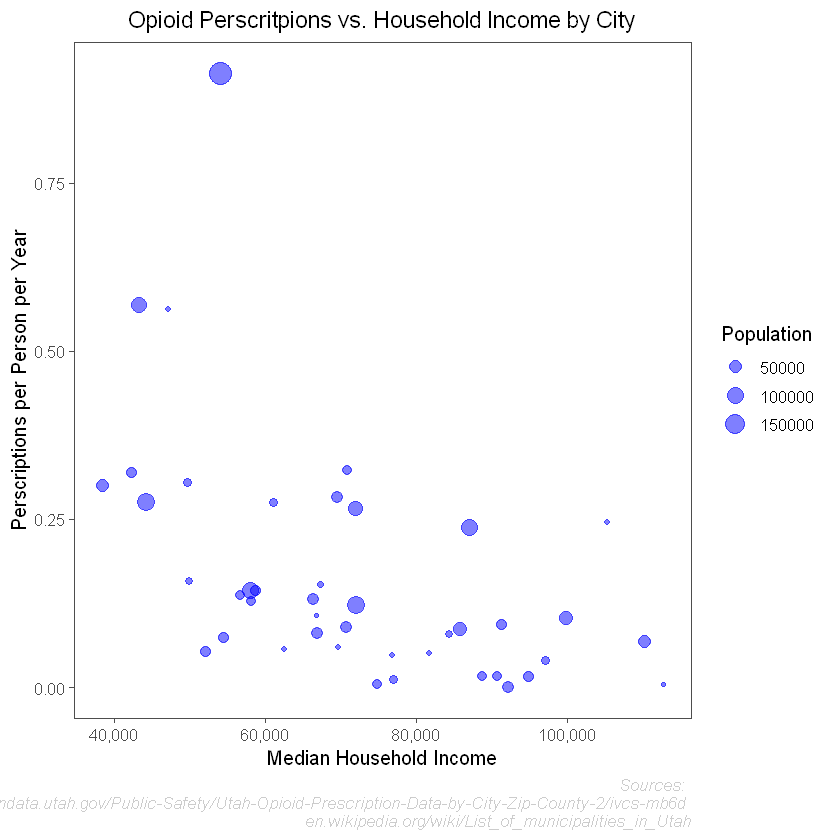

In [4]:
#plot a scatter of scrips per cap vs income with point size determined by population
ggplot(ut_op_bycity_merge_large, aes(x = Median_income, y = scrip_percap_peryear, size = Population))+
    geom_point(alpha = 0.5, color = "blue")+
    scale_x_continuous(labels = scales::comma)+
    labs(x = "Median Household Income", y = "Perscriptions per Person per Year", title = "Opioid Perscritpions vs. Household Income by City", caption = "Sources: \n opendata.utah.gov/Public-Safety/Utah-Opioid-Prescription-Data-by-City-Zip-County-2/ivcs-mb6d \n en.wikipedia.org/wiki/List_of_municipalities_in_Utah")+
    theme_few()+
    theme(legend.position = "right",
         legend.direction = "vertical", 
         plot.title = element_text(size = 14, hjust = 0.5),
         plot.caption = element_text(size = 10, face = 'italic', color = 'gray80'))
ggsave("ut_scrips_income.png", height = 6, width = 8, units = "in")

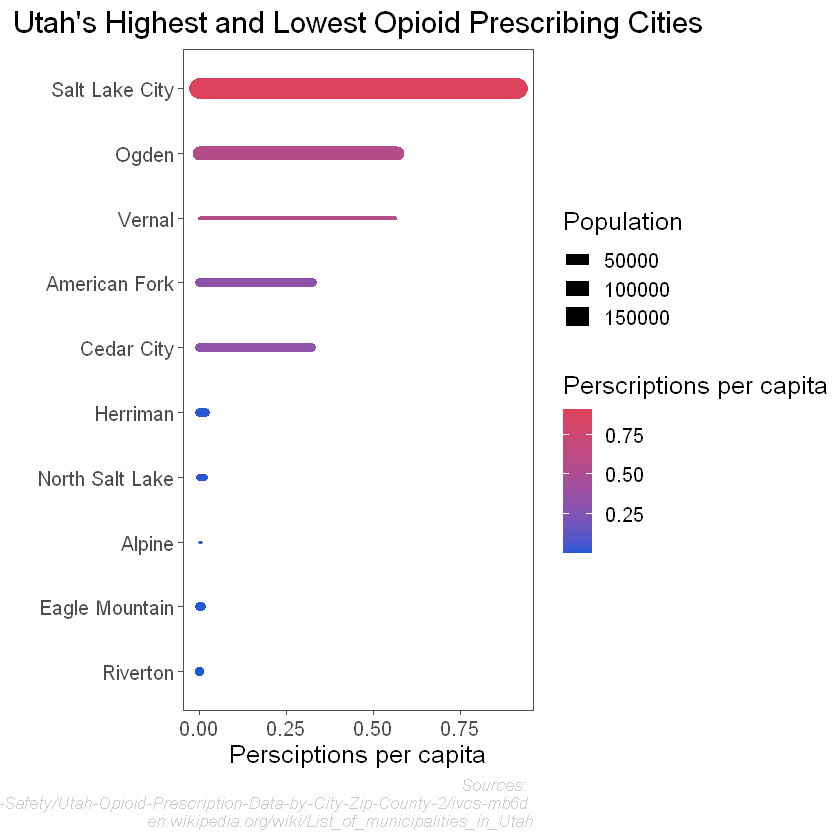

In [5]:
#Create a lollipop plot with city on the y axis, and scrips per cap per year on the x

ggplot(ut_op_bycity_merge_large_tb5, aes(x = scrip_percap_peryear, y = City))+
    geom_segment(lineend = "round", aes(x = 0, y = City, xend = scrip_percap_peryear, yend = City, color = scrip_percap_peryear, size = Population))+
    labs(x = "Persciptions per capita", y = "", title = "Utah's Highest and Lowest Opioid Prescribing Cities", color = "Perscriptions per capita", caption = "Sources: \n opendata.utah.gov/Public-Safety/Utah-Opioid-Prescription-Data-by-City-Zip-County-2/ivcs-mb6d \n en.wikipedia.org/wiki/List_of_municipalities_in_Utah")+
    scale_color_gradient(low = "#1e58d6", high = "#de425b")+
    theme_few()+
    theme(text = element_text(size = 15), 
          axis.text = element_text(size = 12),
          plot.title = element_text(hjust = 0.5),
          plot.caption = element_text(size = 10, face = 'italic', color = 'gray80'))

ggsave("ut_hilo_bar.png", height = 6, width = 10, units = "in")